In [1]:
import pandas as pd
import numpy as np


In [2]:
books_df = pd.read_csv('books_data/books.csv',encoding='ISO-8859-1', sep=';', on_bad_lines='skip')
ratings_df = pd.read_csv('books_data/ratings.csv',encoding='ISO-8859-1', sep=';')
users_df = pd.read_csv('books_data/users.csv',encoding='ISO-8859-1', sep=';')

C:\Users\bwrig\AppData\Local\Temp\ipykernel_31532\2000191207.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('books_data/books.csv',encoding='ISO-8859-1', sep=';', on_bad_lines='skip')


In [3]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
cluster_df = ratings_df.merge(users_df,on='User-ID').merge(books_df[['ISBN','Year-Of-Publication','Book-Author']],on='ISBN').dropna().reset_index().drop(columns=['index'])

In [7]:
cluster_df.head()

,User-ID,ISBN,Book-Rating,Location,Age,Year-Of-Publication,Book-Author
0,276727,0446520802,0,"h, new south wales, australia",16.0,1996,Nicholas Sparks
1,276729,052165615X,3,"rijeka, n/a, croatia",16.0,1999,Philip Prowse
2,276729,0521795028,6,"rijeka, n/a, croatia",16.0,2001,Sue Leather
3,276733,2080674722,0,"paris, n/a, france",37.0,1998,Michel Houellebecq
4,276747,0060517794,9,"iowa city, iowa, usa",25.0,2003,Rebecca Wells


In [8]:
from sklearn.preprocessing import LabelEncoder


In [9]:
cat_cols = ['ISBN', 'Location','Book-Author','Year-Of-Publication']

In [10]:
les = {}
cluster_df = cluster_df[~cluster_df['Year-Of-Publication'].isin(['DK Publishing Inc','Gallimard'])].reset_index().drop(columns=['index'])
cluster_df['Year-Of-Publication'] = cluster_df['Year-Of-Publication'].map(str)
df = pd.DataFrame(cluster_df)
for col in cat_cols:
    le = LabelEncoder()
    les[col] = le
    df[col] = le.fit_transform(cluster_df[col])


In [11]:
df.head()

,User-ID,ISBN,Book-Rating,Location,Age,Year-Of-Publication,Book-Author
0,276727,79827,0,5825,16.0,87,62209
1,276729,96101,3,11984,16.0,90,66993
2,276729,96130,6,11984,16.0,92,78896
3,276733,209259,0,10939,37.0,89,59520
4,276747,4715,9,6711,25.0,94,69140


In [12]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [13]:
scaler = StandardScaler().fit(df)
s_df = scaler.transform(df)

In [14]:
from sklearn.cluster import KMeans
# load data
inertias = []
MAX_CLUSTERS = 34
K = range(11,MAX_CLUSTERS,5)

Cluster Centroids for 11 clusters:
[[ 8.42620834e-01 -5.27517468e-01 -5.13297787e-01 -7.37261315e-01
  -1.81944090e-01  5.92456662e-02 -9.88714354e-01]
 [ 3.49518204e-01 -1.46577555e-01 -3.80326453e-01 -5.84243772e-02
   2.13705196e+00  4.97777124e-03  6.72343866e-02]
 [-9.34754080e-01 -1.81998067e-02 -5.50767362e-01  7.56868833e-01
  -3.72142809e-02  6.96380196e-02  9.65829212e-01]
 [-1.98960583e-02  3.78132745e-01  7.24467291e-02 -7.44911080e-03
  -1.33715444e-01 -6.72125630e+00 -1.00204629e-01]
 [ 9.94249824e-01 -3.09177231e-01 -5.78072812e-01  8.91915521e-01
  -2.75207848e-01  8.22195603e-02  4.49528736e-01]
 [-2.61365353e-02  1.41279899e+00 -6.63184894e-01  9.96627204e-02
  -2.01431724e-01  2.03574497e-01 -6.70394365e-01]
 [ 1.40341826e-02 -7.02523178e-01  1.47343759e+00  1.02841405e-01
  -4.54150138e-02  9.84569527e-02  6.73493149e-03]
 [ 7.54873853e-01  2.72460934e-01 -4.89914915e-01 -9.82465120e-01
  -1.34827491e-01  9.62246994e-02  9.87635059e-01]
 [-1.42783299e-01  1.19902065

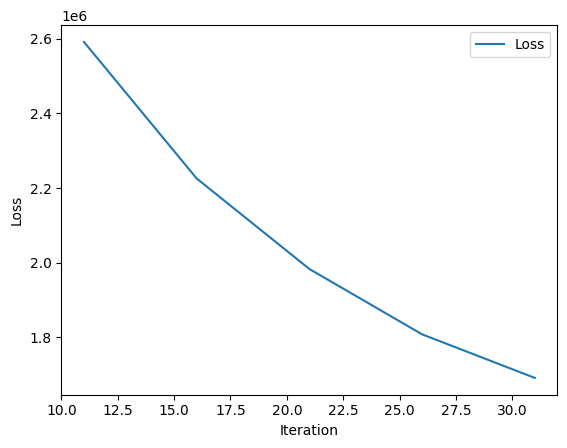

In [15]:


# try different numbers of clusters
for n_clusters in K:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(s_df)
    labels = kmeans.predict(s_df)
    print("Cluster Centroids for {} clusters:".format(n_clusters))
    print(kmeans.cluster_centers_)
    print("\nCluster Labels for {} clusters:".format(n_clusters))
    print(labels)
    inertias.append(kmeans.inertia_)
plt.figure()
plt.plot(K,inertias, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [41]:
N_CLUSTERS = 26

kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(s_df)
labels = kmeans.predict(s_df)

In [42]:
cluster_df['Label'] = labels
df['Label'] = labels


In [43]:
cluster_df.head()

,User-ID,ISBN,Book-Rating,Location,Age,Year-Of-Publication,Book-Author,Label
0,276727,0446520802,0,"h, new south wales, australia",16.0,1996,Nicholas Sparks,12
1,276729,052165615X,3,"rijeka, n/a, croatia",16.0,1999,Philip Prowse,14
2,276729,0521795028,6,"rijeka, n/a, croatia",16.0,2001,Sue Leather,6
3,276733,2080674722,0,"paris, n/a, france",37.0,1998,Michel Houellebecq,9
4,276747,0060517794,9,"iowa city, iowa, usa",25.0,2003,Rebecca Wells,6


In [44]:
import xgboost as xgb
import sklearn.metrics as metrics


In [70]:
x_cols = ['ISBN','Label']
y_cols = ['Book-Rating']
msk = np.random.rand(len(df)) < .8

X_train = df[msk][x_cols]
y_train = df[msk][y_cols]

X_test = df[~msk][x_cols]
y_test = df[~msk][y_cols]


In [75]:
def train_test_xgb(X_train,y_train,X_test,y_test):
    xgb_model = xgb.XGBClassifier(objective='multi:softmax', random_state=42,n_estimators=250,device="gpu")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    dist = metrics.mean_absolute_error(y_test,y_pred)
    #xgb_model.save_model('xgboost_model'+str(acc)+'.json')
    print('XGB Accuracy: %.9f%%' % (acc*100))
    print('Mean absoulte error: ', dist)
    return acc

In [ ]:
train_test_xgb(X_train,y_train,X_test,y_test)

In [69]:
cluster_df.groupby('User-ID').count().reset_index().sort_values(by='ISBN')['ISBN'].quantile(.8)

7.0

In [24]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
